In [8]:
# notebooks/eda.ipynb

# === 1. Importações e configuração ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações gerais de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# === 2. Carregar dataset limpo ===
df = pd.read_csv("../outputs/clean_dataset.csv")

# Mostrar as primeiras linhas
df.head()

,customer_id,age,gender,marital_status,occupation,income_level,education_level,geo_info,location,coverage_amount,...,deductible,policy_type,claim_history,risk_profile,prev_claims,credit_score,has_claim,claim_frequency,claim_severity,loss_ratio
0,84966,23,Female,Married,Entrepreneur,70541,Associate Degree,Mizoram,37534,366603,...,1604,Group,5,1,3,728,1,3,1.666667,0.001819
1,95568,26,Male,Widowed,Manager,54168,Doctorate,Goa,63304,780236,...,1445,Group,0,1,2,792,0,2,0.000000,0.000000
2,10544,29,Female,Single,Entrepreneur,73899,Associate Degree,Rajasthan,53174,773926,...,1612,Group,4,2,1,719,1,1,4.000000,0.000906
3,77033,20,Male,Divorced,Entrepreneur,63381,Bachelor's Degree,Sikkim,22803,787815,...,1817,Family,5,3,0,639,1,0,5.000000,0.001152
4,88160,25,Female,Separated,Manager,38794,Bachelor's Degree,West Bengal,92858,366506,...,133,Family,3,0,3,720,1,3,1.000000,0.002351


### Distribuição de variáveis contínuas e categóricas

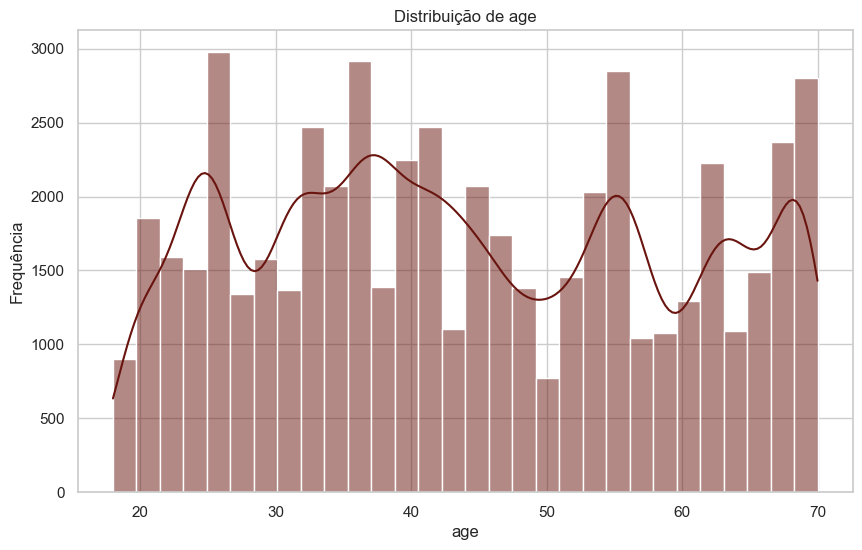

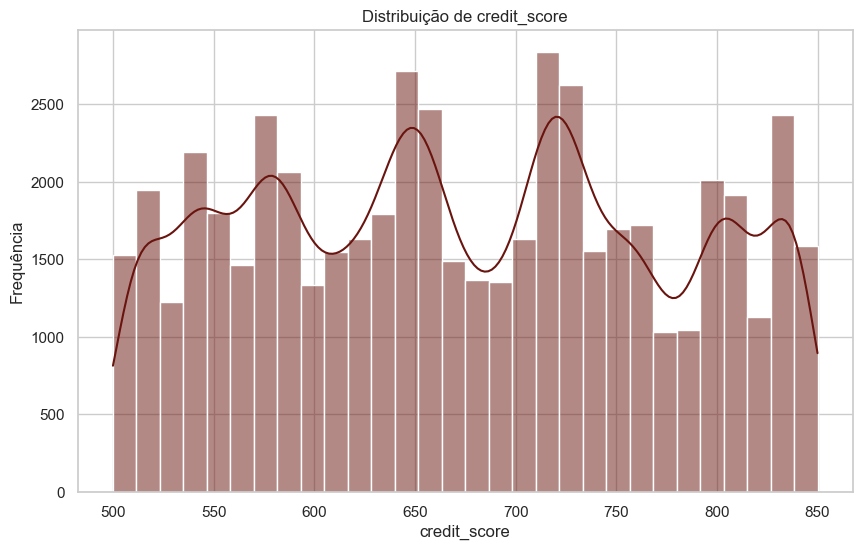

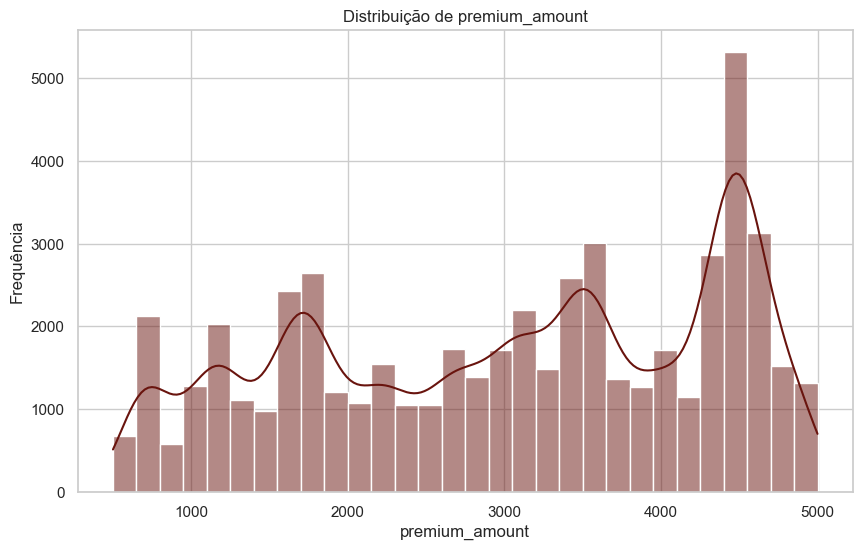

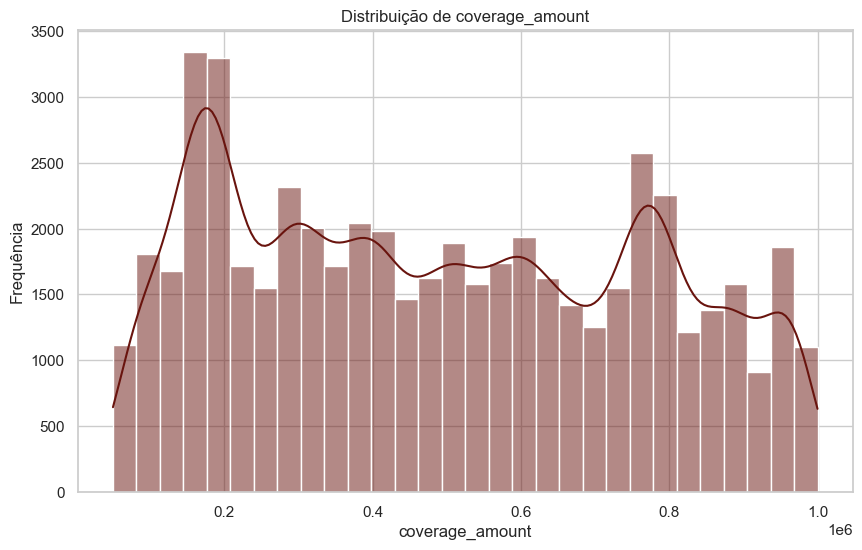

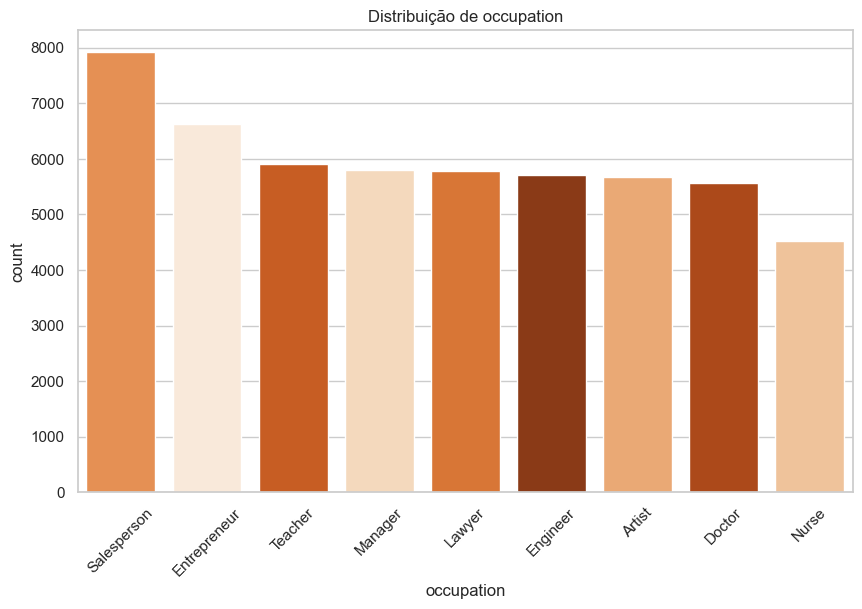

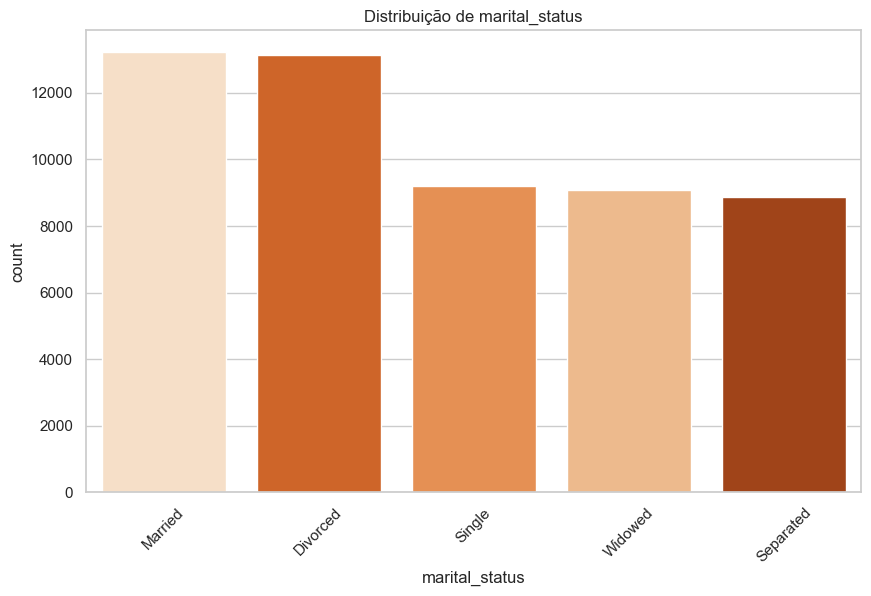

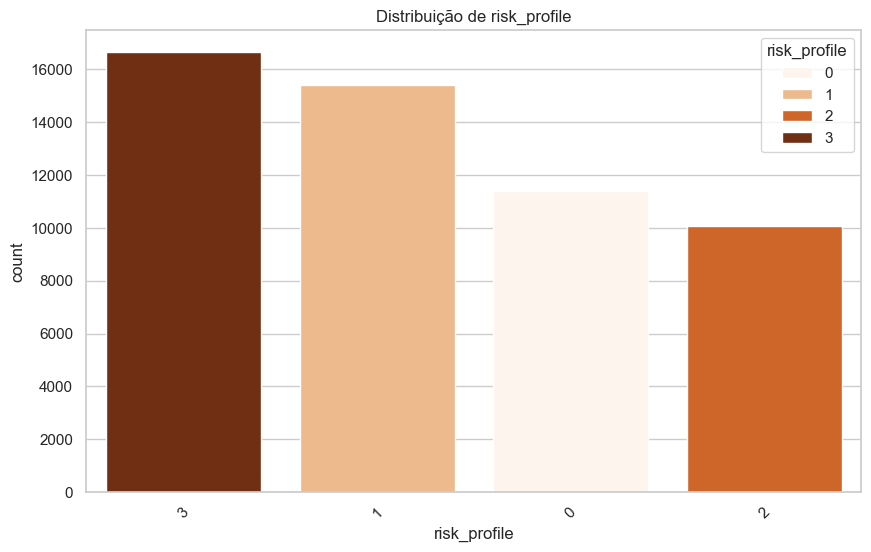

In [9]:
# Variáveis contínuas: idade, score de crédito, prêmio, cobertura
continuous_vars = ["age", "credit_score", "premium_amount", "coverage_amount"]

for var in continuous_vars:
    plt.figure()
    sns.histplot(df[var], kde=True, bins=30, color="#69140e")
    plt.title(f"Distribuição de {var}")
    plt.xlabel(var)
    plt.ylabel("Frequência")
    plt.show()

# Variáveis categóricas: occupation, marital_status, risk_profile
categorical_vars = ["occupation", "marital_status", "risk_profile"]

for var in categorical_vars:
    plt.figure()
    sns.countplot(data=df, x=var, order=df[var].value_counts().index, palette="Oranges", hue=var)
    plt.title(f"Distribuição de {var}")
    plt.xticks(rotation=45)
    plt.show()

### Taxa de sinistralidade por segmento

marital_status
Separated    0.808712
Married      0.798699
Widowed      0.793324
Single       0.788907
Divorced     0.769675
Name: has_claim, dtype: float64


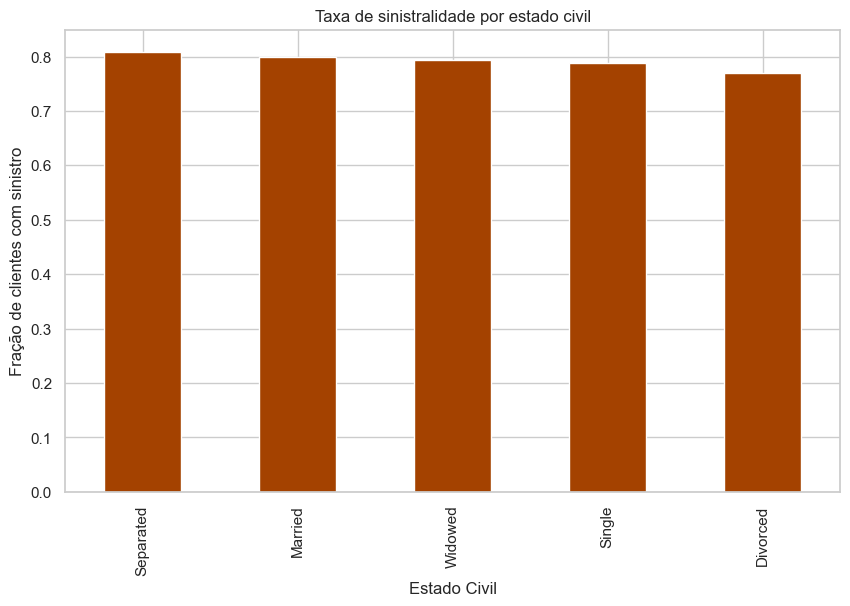

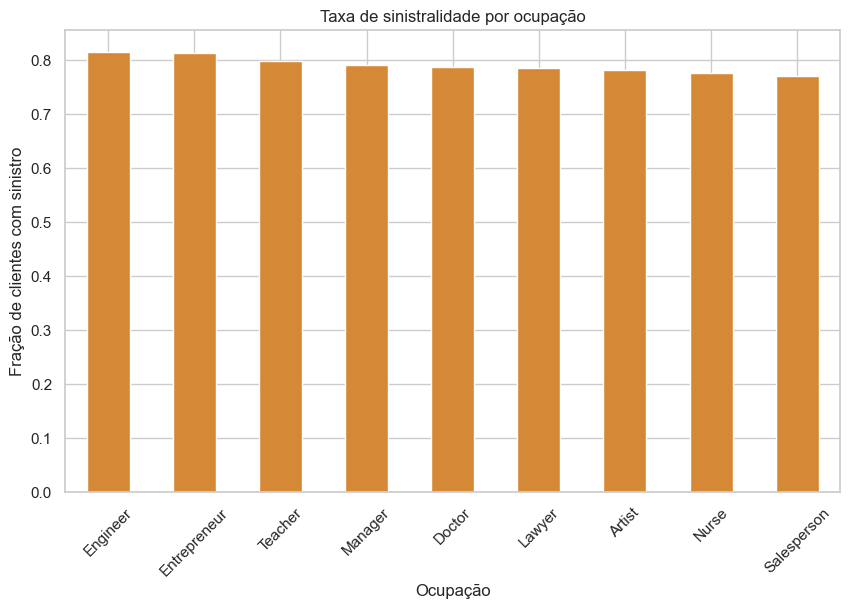

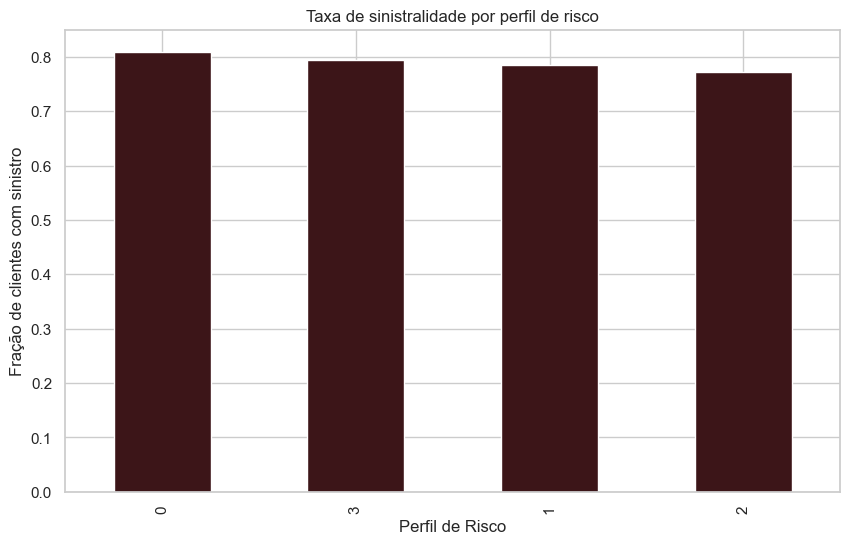

In [10]:
# Criar uma coluna de sinistralidade binária
# (já temos df["has_claim"] do prepare_data.py)

# Marital Status
sinistralidade_marital = df.groupby("marital_status")["has_claim"].mean().sort_values(ascending=False)
print(sinistralidade_marital)

# Visualização
plt.figure()
sinistralidade_marital.plot(kind="bar", color="#a44200")
plt.title("Taxa de sinistralidade por estado civil")
plt.ylabel("Fração de clientes com sinistro")
plt.xlabel("Estado Civil")
plt.show()

# Occupation
sinistralidade_occupation = df.groupby("occupation")["has_claim"].mean().sort_values(ascending=False)
plt.figure()
sinistralidade_occupation.plot(kind="bar", color="#d58936")
plt.title("Taxa de sinistralidade por ocupação")
plt.ylabel("Fração de clientes com sinistro")
plt.xlabel("Ocupação")
plt.xticks(rotation=45)
plt.show()

# Risk Profile
sinistralidade_risk = df.groupby("risk_profile")["has_claim"].mean().sort_values(ascending=False)
plt.figure()
sinistralidade_risk.plot(kind="bar", color="#3c1518")
plt.title("Taxa de sinistralidade por perfil de risco")
plt.ylabel("Fração de clientes com sinistro")
plt.xlabel("Perfil de Risco")
plt.show()

In [11]:
# Relação entre Prêmio e Sinistralidade

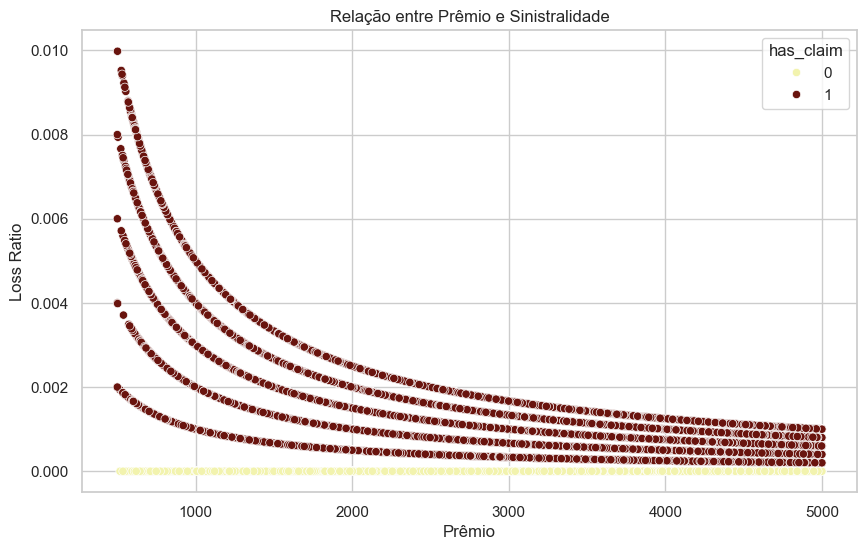

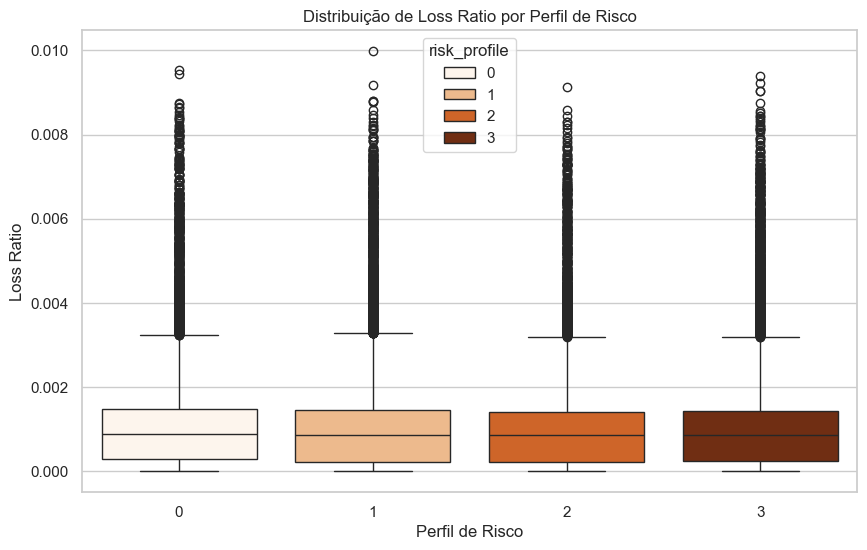

In [12]:
# Scatter plot: prêmio vs loss_ratio
plt.figure()
sns.scatterplot(data=df, x="premium_amount", y="loss_ratio", hue="has_claim", palette=["#f2f3ae", "#69140e"])
plt.title("Relação entre Prêmio e Sinistralidade")
plt.xlabel("Prêmio")
plt.ylabel("Loss Ratio")
plt.show()

# Boxplot de Loss Ratio por Risk Profile
plt.figure()
sns.boxplot(data=df, x="risk_profile", y="loss_ratio", palette="Oranges", hue="risk_profile")
plt.title("Distribuição de Loss Ratio por Perfil de Risco")
plt.xlabel("Perfil de Risco")
plt.ylabel("Loss Ratio")
plt.show()

In [13]:
# Correlações numéricas

In [14]:
# Selecionar apenas colunas numéricas relevantes
numeric_vars = ["age", "credit_score", "premium_amount", "coverage_amount", 
                "deductible", "claim_frequency", "claim_severity", "loss_ratio", "has_claim"]

corr_matrix = df[numeric_vars].corr()

# Mostrar correlações com has_claim
corr_with_claim = corr_matrix["has_claim"].sort_values(ascending=False)
print("Correlação das variáveis numéricas com ocorrência de sinistro (has_claim):")
print(corr_with_claim)

# Correlação com loss_ratio
corr_with_loss = corr_matrix["loss_ratio"].sort_values(ascending=False)
print("\nCorrelação das variáveis numéricas com sinistralidade (loss_ratio):")
print(corr_with_loss)

# Correlação com claim_severity
corr_with_severity = corr_matrix["claim_severity"].sort_values(ascending=False)
print("\nCorrelação das variáveis numéricas com severidade de sinistro (claim_severity):")
print(corr_with_severity)


Correlação das variáveis numéricas com ocorrência de sinistro (has_claim):
has_claim          1.000000
claim_severity     0.584909
loss_ratio         0.461380
premium_amount     0.001826
credit_score      -0.005608
deductible        -0.007303
age               -0.008080
coverage_amount   -0.010951
claim_frequency   -0.012448
Name: has_claim, dtype: float64

Correlação das variáveis numéricas com sinistralidade (loss_ratio):
loss_ratio         1.000000
claim_severity     0.508608
has_claim          0.461380
credit_score       0.006911
coverage_amount    0.002873
deductible        -0.002142
age               -0.004607
claim_frequency   -0.026466
premium_amount    -0.559985
Name: loss_ratio, dtype: float64

Correlação das variáveis numéricas com severidade de sinistro (claim_severity):
claim_severity     1.000000
has_claim          0.584909
loss_ratio         0.508608
coverage_amount    0.004191
age               -0.002225
credit_score      -0.003793
deductible        -0.007624
premium_am